# BERT
Because BERT only have a part of transformer encoder, so we only build this transformer encoder

In [58]:
import torch.nn as nn
import torch

In [59]:
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim: int, num_heads: int) -> None:
        super().__init__()
        self.multi_head_attention = nn.MultiheadAttention(embed_dim=embed_dim, 
                                                          num_heads=num_heads,
                                                          batch_first=True)
        
        self.layer_normalization_multi_head = nn.LayerNorm(embed_dim)
        
        self.layer_normalization_feed_forward = nn.LayerNorm(embed_dim)
        
        self.feed_froward = nn.Sequential(
            nn.Linear(embed_dim, 2048),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(2048, embed_dim)
        )
        
    def forward(self, x):
        original_input = torch.clone(x)
        
        query = torch.clone(x)
        key = torch.clone(x)
        value = torch.clone(x)
        attn_output, _ = self.multi_head_attention(query, key, value)

        add_attn_output = self.layer_normalization_multi_head(original_input + attn_output)
        feed_forward_output = self.feed_froward(add_attn_output)
        out = self.layer_normalization_feed_forward(add_attn_output + feed_forward_output)
        
        return out

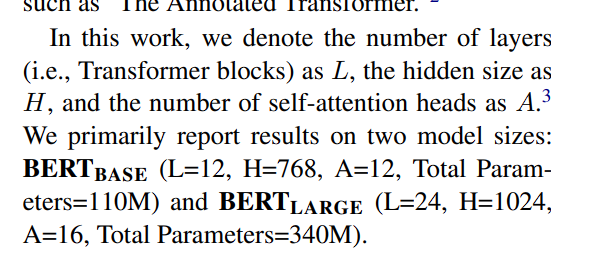

Now let's create BERT. BERT have 12 identical layers of Transformer Encoders. For each Transformer Encoder, it has 12 number of attention head. For the embeddings it will have 768


In [60]:
class BERT(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        EMBEDDING_SIZE = 768
        NUM_HEAD_ATTENTION = 12
        self.model = nn.Sequential(
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
            TransformerEncoder(EMBEDDING_SIZE, NUM_HEAD_ATTENTION),
        )
        
    def forward(self, x):
        return self.model(x)

In [61]:
# [Batch Size, Tokens, Embeddings]
EMBEDDING_SIZE = 768

input_example = torch.randn(1, 3, EMBEDDING_SIZE)
model = TransformerEncoder(EMBEDDING_SIZE, 4)
model(input_example)

tensor([[[ 0.3062, -0.2891,  0.5446,  ...,  0.2081,  0.0085, -0.0546],
         [-0.9145, -0.0422,  0.5809,  ...,  0.1923, -0.5014,  0.5368],
         [-0.1189,  0.2626, -1.4675,  ..., -0.9733, -0.8484,  0.2778]]],
       grad_fn=<NativeLayerNormBackward0>)

In [62]:
bert_model = BERT()
bert_model(input_example)

tensor([[[ 1.4201,  1.1222,  0.6567,  ...,  0.9355, -0.8462, -0.8076],
         [ 1.3948,  0.9473,  0.2735,  ...,  1.7569, -1.8888,  0.5051],
         [ 1.1526,  1.5832,  0.1367,  ...,  0.0841, -2.4715, -0.8533]]],
       grad_fn=<NativeLayerNormBackward0>)

In [63]:
bert_model

BERT(
  (model): Sequential(
    (0): TransformerEncoder(
      (multi_head_attention): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
      )
      (layer_normalization_multi_head): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (layer_normalization_feed_forward): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (feed_froward): Sequential(
        (0): Linear(in_features=768, out_features=2048, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1, inplace=False)
        (3): Linear(in_features=2048, out_features=768, bias=True)
      )
    )
    (1): TransformerEncoder(
      (multi_head_attention): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
      )
      (layer_normalization_multi_head): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (layer_normalization_feed_forward): LayerNorm((768,), eps=1e-05, e